TASKSHEET 5.1P 


In this task, we captured gyroscope readings from the LSM6DS3 sensor integrated into the Arduino Nano 33 IoT. The sensor records three axes of rotational movement: x, y, and z. The data was collected over time, transmitted to a Python script via serial communication, and uploaded to a Firebase Realtime Database using the Firebase Admin SDK. After completing data collection, we retrieved the data from Firebase, cleaned it to remove any invalid or missing values, saved it as a CSV file, and plotted the x, y, and z variables using line graphs. This exercise highlighted how to connect hardware sensors with software, perform real-time data acquisition, store data in the cloud, and conduct basic data analysis and visualization.


In [10]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Load the service account key JSON file using the full path
cred = credentials.Certificate(
    r"C:\Users\Andil\Downloads\sensordataproject-545b1-firebase-adminsdk-fbsvc-1102705c57.json"
)

# Initialize the app if not already initialized
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://sensordataproject-545b1-default-rtdb.firebaseio.com/'
    })

# Now you can interact with the database
ref = db.reference('/')  # reference to root
print(ref.get())  # fetches all data from root


{'gyroscope_data': {'-OYAGYwbFl6BuxUMduj2': {'timestamp': '6:16:38 am.688', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZ-XttfDdGpNa5AN': {'timestamp': '6:16:38 am.778', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZ3XFe24xpf4rvPz': {'timestamp': '6:16:38 am.889', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZ7_NEdl9HxbyqyH': {'timestamp': '6:16:38 am.985', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZBSovPPyI-M4bHo': {'timestamp': '6:16:39 am.97', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZGs1OJeOuFWDDyw': {'timestamp': '6:16:39 am.193', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZLj5BrQKdMzUlqu': {'timestamp': '6:16:39 am.306', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZQcP3w2Vh3QVa-X': {'timestamp': '6:16:39 am.402', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZUZrx4LmrP9umMz': {'timestamp': '6:16:39 am.513', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZZ-FR9icnTlnqsq': {'timestamp': '6:16:39 am.609', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZcj3bp8GFjTqhHF': {'timestamp': '6:16:39 am.705', 'x': 0.0, 'y': 0.0, 'z': 0.0}, '-OYAGZhfTaz3jY1OI_eQ': 

In [8]:
import os
print(os.getcwd())



C:\Users\Andil


In [12]:
import csv

with open(r"C:\Users\Andil\OneDrive\Desktop\gyro_data.csv", 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        print(row)


{'Timestamp': '6:16:38 am.688', 'Value': '0.45,-33.51,-105.10,-108.15\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:38 am.778', 'Value': '0.55,-60.30,-49.32,-47.61\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:38 am.889', 'Value': '0.66,-51.64,-17.15,-37.05\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:38 am.985', 'Value': '0.76,-23.86,-4.52,-27.10\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.97', 'Value': '0.86,-17.09,-6.41,-14.71\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.193', 'Value': '0.96,-0.31,1.04,-8.06\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.306', 'Value': '1.07,-3.48,2.26,-9.64\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.402', 'Value': '1.17,-11.84,-2.26,-19.71\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.513', 'Value': '1.27,0.31,-3.36,-33.39\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.609', 'Value': '1.38,14.34,0.73,-46.26\\r\\n', 'Type': 'received'}
{'Timestamp': '6:16:39 am.705', 'Value': '1.48,38.09,22.

In [13]:
# Reference to your Firebase location (like 'gyroscope_data')
ref = db.reference('gyroscope_data')

# Open CSV and push each row
with open(r"C:\Users\Andil\OneDrive\Desktop\gyro_data.csv", 'r') as file:  # Use your actual path
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        try:
            # Prepare data in correct format
            data = {
                'timestamp': row.get('timestamp', row.get('ï»¿Timestamp', '')),  # Try both possible keys
                'x': float(row.get('x', 0)),
                'y': float(row.get('y', 0)),
                'z': float(row.get('z', 0))
            }
            # Push to Firebase
            ref.push(data)
        except ValueError:
            # Skip rows with invalid data
            print("Skipping row:", row)


In [14]:
import pandas as pd

# Reference to the same Firebase node
ref = db.reference('gyroscope_data')

# Get all data from Firebase
all_data = ref.get()

# Convert Firebase data (dict) to a list
data_list = []
for key, value in all_data.items():
    try:
        # Ensure values are numbers
        data_list.append({
            'timestamp': value['timestamp'],
            'x': float(value['x']),
            'y': float(value['y']),
            'z': float(value['z'])
        })
    except (ValueError, KeyError):
        # Skip any invalid data
        print("Skipping invalid entry:", value)

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Save as clean CSV
df.to_csv('gyro_data_clean.csv', index=False)

print("Clean CSV saved as 'gyro_data_clean.csv'.")


Clean CSV saved as 'gyro_data_clean.csv'.


TypeError: 'value' must be an instance of str or bytes, not a float

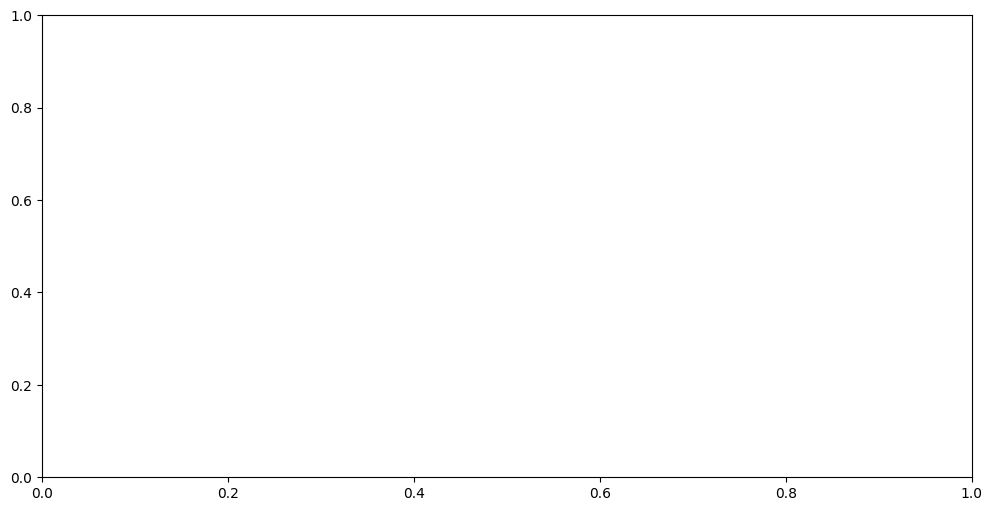

In [17]:
import matplotlib.pyplot as plt

# Read the clean CSV
df = pd.read_csv('gyro_data_clean.csv')

# Plot x, y, z separately
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x'], label='X')
plt.plot(df['timestamp'], df['y'], label='Y')
plt.plot(df['timestamp'], df['z'], label='Z')
plt.xlabel('Timestamp')
plt.ylabel('Gyroscope Reading')
plt.title('Gyroscope X, Y, Z over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The gyroscope readings displayed variations along the x, y, and z axes, indicating rotational movements of the device over time. Certain axes showed greater fluctuations, suggesting dominant rotations in specific directions, while some recurring patterns pointed to periodic motion. Gradual trends and sudden spikes highlighted both smooth rotations and abrupt movements. By cleaning the data to remove invalid or missing values, we obtained a smooth dataset suitable for visualization. The combined graph of all three axes enabled comparison of relative changes, revealing which axis experienced the most motion at different times. Overall, the analysis illustrated how gyroscope data effectively captures the dynamic rotational behavior of the device.
